## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_of_mice = mouse_data['Mouse ID'].unique()
len(num_of_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])

# we have 5 duplicates
duplicates.sum()

5

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]

# get all the data for those 5 duplicates
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_groupby = clean_data.groupby(['Drug Regimen'])
mean = drug_regimen_groupby.mean()['Tumor Volume (mm3)']
median = drug_regimen_groupby.median()['Tumor Volume (mm3)']
variance = drug_regimen_groupby.var()['Tumor Volume (mm3)']
std = drug_regimen_groupby.std()['Tumor Volume (mm3)']
sem = drug_regimen_groupby.sem()['Tumor Volume (mm3)']

stat_results = pd.DataFrame({'Mean': mean,
                            'Median': median,
                            'Variance': variance,
                            'Standard Deviation': std,
                            'SEM': sem})
stat_results

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggr_results = drug_regimen_groupby.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
aggr_results


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

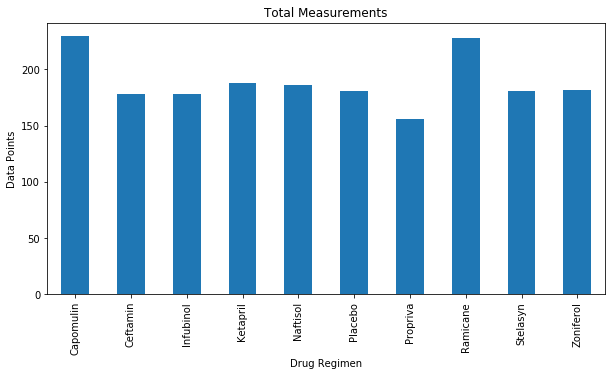

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#aggr_results.plot(kind="bar")
#drug_regimen_groupby.plot(kind="bar")
#clean_data.plot(kind='bar', )
# total_measurements = drug_regimen_groupby.var()
total_measurements = drug_regimen_groupby.count()['Mouse ID']
total_measurements.plot(kind='bar', figsize=(10,5), legend=False)

#set chart title
plt.title("Total Measurements")
plt.ylabel("Data Points")
#plt.legend( loc='upper right', bbox_to_anchor=(1.35, 0.75))

#show chart and set layout
plt.show()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Natfisol', 'Placebo',
         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
# values = clean_data['Drug Regimen'].unique()
# drugs = list(values)
drugs = drug_regimen_groupby.indices
li = [x for x in drugs.keys()]
drugs = li
measurements = drug_regimen_groupby.count()['Mouse ID']
measurements = [x for x in measurements]

# plt.figure(figsize=(10,5))
# plt.bar(drugs, measurements, width=0.50)
# plt.title('Total Measurements')
# plt.xlabel("Drug Regimen")
# plt.ylabel("Measurement Points")
# plt.xticks(rotation=90)
# plt.xlim(-0.55, len(drugs)-0.55)
# plt.show()


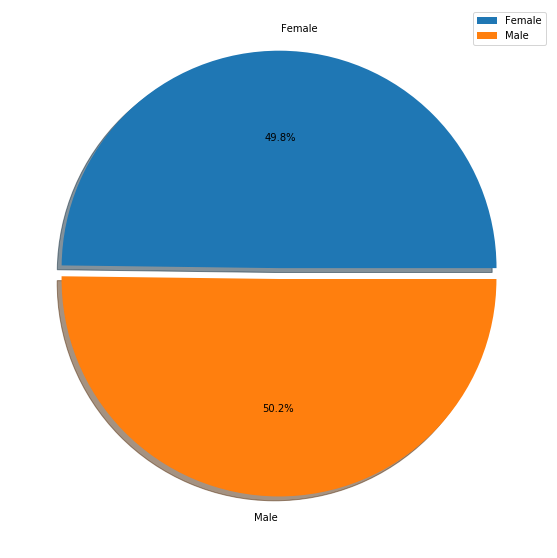

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#sex_groupby = clean_data.groupby(['Sex']).count()['Mouse ID']
#sex_groupby = clean_data.groupby(['Sex'])

groupby_gender = clean_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender_df

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ['Count']
#sex_groupby_df = mouse_gender.rename(columns={'Mouse ID': 'Count'})

mouse_gender.plot(kind='pie', y='Count', autopct="%1.1f%%", explode=(0.05, 0), figsize=(10, 10), shadow=True)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# get the percentage first - but we don't need this really
# sex_groupby_df['Percentage'] = sex_groupby_df['Count'] / clean_data.count()['Mouse ID'] * 100

labels = ['Female', 'Male']
# percentage = [x for x in sex_groupby_df['Percentage']]
# percentage
# counts = clean_data['Sex'].value_counts()
counts = list(mouse_gender['Count'])
# counts = [counts['Female'], counts['Male']]

# explode = (0.05, 0)

# # Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
# plt.figure(figsize=(10, 10))
plt.pie(counts, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)
plt.legend()
plt.show()


NameError: name 'explode' is not defined

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# get the regimes we're interested in only
reg4 = clean_data[clean_data['Drug Regimen'].isin(regimens)]
reg_sorted = reg4.groupby(['Drug Regimen', 'Mouse ID']).max()['Timepoint']
reg_df = reg_sorted.to_frame()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(clean_data, reg_df, on=['Mouse ID', 'Timepoint'])
# merged = merged.set_index('Drug Regimen')
# mouse_ids = clean_data['Mouse ID'].unique()
# print(len(mouse_ids))

# capomulin_df = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
# ramicane_df = clean_data[clean_data['Drug Regimen'] == 'Ramicane']
# infubinol_df = clean_data[clean_data['Drug Regimen'] == 'Infubinol']
# ceftamin_df = clean_data[clean_data['Drug Regimen'] =='Ceftamin']

# final_res = pd.DataFrame({'Capomulin': capomulin_merged[['', '']],
#                          'Ramicane': ramicane_merged,
#                          'Infubinol': infubinol_merged,
#                          'Ceftamin': ceftamin_merged })


# capomulin = capomulin_df.groupby(['Drug Regimen','Mouse ID']).last()['Timepoint']
# ramicane = ramicane_df.groupby(['Drug Regimen','Mouse ID']).last()['Timepoint']
# infubinol = infubinol_df.groupby(['Drug Regimen','Mouse ID']).last()['Timepoint']
# ceftamin = ceftamin_df.groupby(['Drug Regimen','Mouse ID']).last()['Timepoint']

# capomulin = pd.DataFrame(capomulin)
# ramicane = pd.DataFrame(ramicane)
# infubinol = pd.DataFrame(infubinol)
# ceftamin = pd.DataFrame(ceftamin)

# capomulin_merged = pd.merge(capomulin, clean_data, how='left', on=['Mouse ID', 'Timepoint'])
# ramicane_merged = pd.merge(ramicane, clean_data, how='left', on=['Mouse ID', 'Timepoint'])
# infubinol_merged = pd.merge(infubinol, clean_data, how='left', on=['Mouse ID', 'Timepoint'])
# ceftamin_merged = pd.merge(ceftamin, clean_data, how='left', on=['Mouse ID', 'Timepoint'])

# capomulin_merged = capomulin_merged.set_index('Drug Regimen')
# ramicane_merged = ramicane_merged.set_index('Drug Regimen')
# infubinol_merged = infubinol_merged.set_index('Drug Regimen')
# ceftamin_merged = ceftamin_merged.set_index('Drug Regimen')

# capomulin_merged = capomulin_merged[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
# ramicane_merged = ramicane_merged[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
# infubinol_merged = infubinol_merged[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
# ceftamin_merged = ceftamin_merged[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

#final_merge = pd.merge??

# final_res = pd.DataFrame({'Capomulin': capomulin_merged,
#                          'Ramicane': ramicane_merged,
#                          'Infubinol': infubinol_merged,
#                          'Ceftamin': ceftamin_merged })
# tumor_volume = {''}
# final_res = pd.DataFrame({'Capomulin': [capomulin_merged['Tumor Volume (mm3)'],
#                                         capomulin_merged['Timepoint'],
#                                         capomulin_merged['Mouse ID']
#                                         ]
#                          })

# #final_res
# final_res.head()
# pd.DataFrame??
#last_data = capomulin_merged.set_index('Drug Regimen')
#last_data
# # # capomulin, ramicane, infubinol, ceftamin
#capomulin = pd.DataFrame(capomulin_df)
# capomulin_vol
# Capomulin_merge = pd.merge(capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
# Capomulin_merge
#capomulin_merged = pd.merge(capomulin_df, clean_data, on=['Mouse ID', 'Timepoint'])



# merged
#final_merge = reg_sorted.reindex(regimens)
#merged = merged.reindex(regimens)
#tumor = [vol for vol in final_merge['Tumor Volume (mm3)']]
#tumor
#final_stuff = pd.DataFrame({'Something': merged})
#merged = pd.merge(clean_data, reg_sorted, how='left', on=['Mouse ID', 'Timepoint'])
#merged
#final = merged.groupby(['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']).max()['Timepoint']

#merged
#merged.head(59)
#merged
#final = merged.groupby(['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']).last()['Timepoint']
#final['Ramicane'].tail(1)
#final[]
# capomulin = merged[merged['Drug Regimen'].isin(['Capomulin'])].tail(1)['Tumor Volume (mm3)']
# ramicane = merged[merged['Drug Regimen'].isin(['Ramicane'])].tail(1)['Tumor Volume (mm3)']
# infubinol = merged[merged['Drug Regimen'].isin(['Infubinol'])].tail(1)['Tumor Volume (mm3)']
# ceftamin = merged[merged['Drug Regimen'].isin(['Ceftamin'])].tail(1)['Tumor Volume (mm3)']

# final_cap = [x for x in capomulin]
# final_ram = [x for x in ramicane]
# final_inf = [x for x in infubinol]
# final_cef = [x for x in ceftamin]
# res = final_cap + final_ram + final_inf + final_cef
# res
# #clean_data[clean_data['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# p = clean_data[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# p.head(50), res


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# we have regimens
# Create empty list to fill with tumor vol data (for plotting)
#drugs = clean_data['Drug Regimen']
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#p = merged[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Mouse ID']]
tumor_lists = merged.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_volumes = {}
# tumor_lists = merged.groupby('Drug Regimen')['Tumor Volume (mm3)']
# tumor_lists.var()
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# quartiles = tumor_volume.quantile([.25, .5, .75])

# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
for i, v in tumor_lists:
    # i is the key, in our case the Drug name
    # v are the list values
    quartiles = v.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # add subset

    print(i)
    print()
        
    print(f"The lower quartile of {i} is: {lowerq:.3f}")
    print(f"The upper quartile of {i} is: {upperq:.3f}")
    print(f"The interquartile range of {i} is: {iqr:.3f}")
    print(f"The the median of occupancy is: {quartiles[0.5]:.3f} ")
    print()

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound:.3f} could be outliers.")
    print(f"Values above {upper_bound:.3f} could be outliers.")
    print()
    
    the_drugs = clean_data.loc[clean_data['Drug Regimen'] == i]
    tumor_values = the_drugs['Tumor Volume (mm3)']

    outliers = tumor_values.loc[(tumor_values < lower_bound) | (tumor_values > upper_bound)]
    if outliers.any():
        outlier = list(outliers)
        print(f'Outlier found for {i}: {list(outliers)[0]}')
        mouse_id_oulier = clean_data.loc[clean_data['Tumor Volume (mm3)'] == outlier[0]]
        mouse_id = list(mouse_id_oulier['Mouse ID'])[0]
        print(f'The outlier"s Mouse ID is: {mouse_id}')
    print()
    print()
    
    # store data into a dictionary
    tumor_volumes[i] = v
#p.set_index('Drug Regimen')
#p
# p.set_index('Drug Regimen', inplace=True)
#  # outliers = p.loc[(p[i] < lower_bound) | (p[i] > upper_bound)]
# p.groupby(['Drug Regimen'])
# p['Capomulin']


Capomulin

The lower quartile of Capomulin is: 32.377
The upper quartile of Capomulin is: 40.159
The interquartile range of Capomulin is: 7.782
The the median of occupancy is: 38.125 

Values below 20.705 could be outliers.
Values above 51.832 could be outliers.



Ceftamin

The lower quartile of Ceftamin is: 48.722
The upper quartile of Ceftamin is: 64.300
The interquartile range of Ceftamin is: 15.578
The the median of occupancy is: 59.852 

Values below 25.355 could be outliers.
Values above 87.666 could be outliers.



Infubinol

The lower quartile of Infubinol is: 54.049
The upper quartile of Infubinol is: 65.526
The interquartile range of Infubinol is: 11.477
The the median of occupancy is: 60.165 

Values below 36.833 could be outliers.
Values above 82.741 could be outliers.

Outlier found for Infubinol: 36.321345799999996
The outlier"s Mouse ID is: c326


Ramicane

The lower quartile of Ramicane is: 31.560
The upper quartile of Ramicane is: 40.659
The interquartile range of Ram

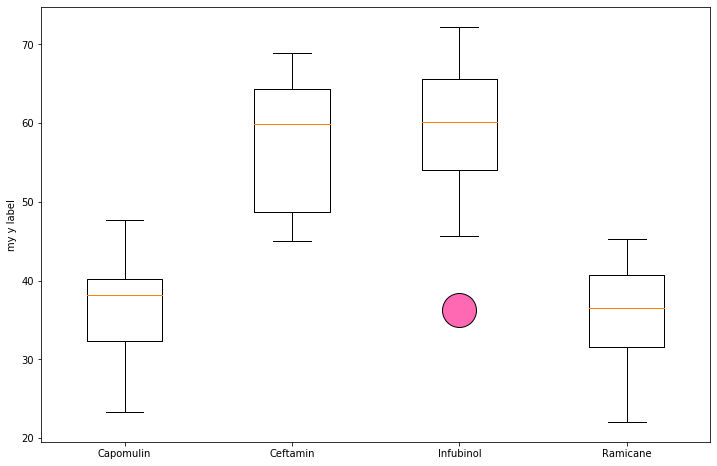

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
names = [key for key in tumor_volumes]
values = [value for value in tumor_volumes.values()]

plt.figure(figsize=(12, 8))

flier = dict(marker='o', markerfacecolor='hotpink', markersize=34)
plt.boxplot(values, labels=names, flierprops=flier)
plt.ylabel('my y label')
plt.show()

## Line and Scatter Plots

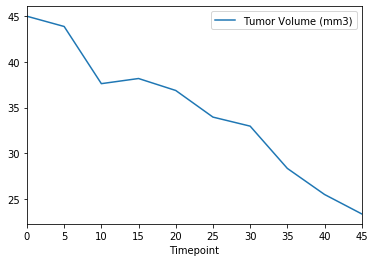

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# get the series with mouse treated with Capomulin
# capomulin_mouse = merged[(merged["Drug Regimen"] == 'Capomulin') & (merged['Mouse ID'] == 'l509')]
# # place all the ids into a list
# capomulin_ids = list(capomulin_mouse['Mouse ID'])
# first_mouse = 'l509'
capomulin_mouse = clean_data[(clean_data["Drug Regimen"] == 'Capomulin')] #& (merged['Mouse ID'] == 'l509')]

capomulin_ids = capomulin_mouse['Mouse ID'].unique()

# take a Mouse id
# print(capomulin_ids)
first_mouse = 's185'
# place all the ids into a list
capomulin_mouse_df = capomulin_mouse[['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
capomulin_mouse_df = capomulin_mouse_df[capomulin_mouse_df['Mouse ID'] == first_mouse]
capomulin_mouse_df
capomulin_mouse_df = capomulin_mouse_df.set_index('Timepoint')

del capomulin_mouse_df['Mouse ID']
capomulin_mouse_df.plot()
# capomulin_mouse_df['Tumor Volume (mm3)'].plot(x='Timepoint', title = f'Tumor Volume vs. Time Point for Mouse ID {first_mouse}')
# plt.tight_layout()
# plt.xlim(-2.5, capomulin_mouse_df['Tumor Volume (mm3)'].max())
# plt.show()

# final = capomulin_mouse_df[['Tumor Volume (mm3)', 'Timepoint']]
# final
#capomulin_ids = list(capomulin_mouse['Mouse ID'])
# get the first mouse in the list
#first_mouse = capomulin_ids[0]
#first_mouse = 'l509'
#first_mouse
# get all the info (measurements) for this mouse
# mouse_info = clean_data[clean_data['Mouse ID'] == first_mouse]
# mouse_info = merged.loc[merged['Mouse ID'] == first_mouse]
# mouse_info
#capomulin_mouse['Timepoint']
#capomulin_mouse
# # plot only the timepoint and tumor volume
#mouse_info[['Timepoint', 'Tumor Volume (mm3)']].plot(title = f'Tumor Volume vs. Time Point for Mouse ID {first_mouse}')
# # mouse_info[['Tumor Volume (mm3)']].plot(title = f'Tumor Volume vs. Time Point for Mouse ID {first_mouse}')
# mouse_info[['Tumor Volume (mm3)']].plot(xticks=timepoints, title = f'Tumor Volume vs. Time Point for Mouse ID {first_mouse}')

# mouse_info[['Tumor Volume (mm3)']].plot(title = f'Tumor Volume vs. Time Point for Mouse ID {first_mouse}')
# plt.legend()
# timepoints

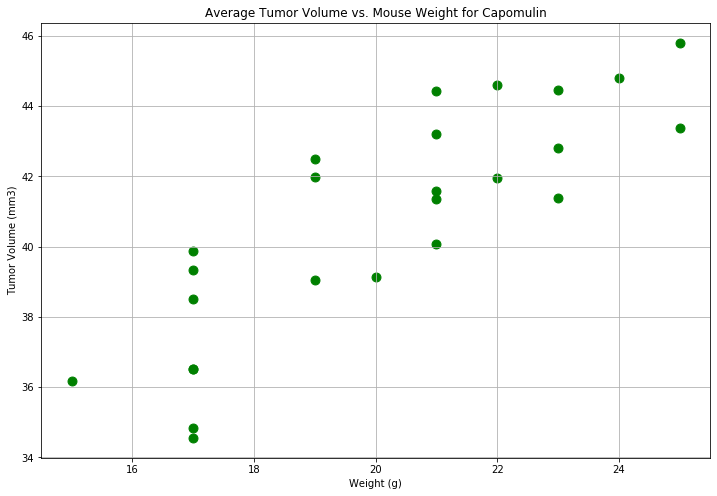

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# get the Capomulin info
capomulin_df = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# capomulin_mouse_df = capomulin_mouse[['Weight (g)', 'Tumor Volume (mm3)', 'Mouse ID']]

# # group the mouse by weight and based on that weight take the mean of the Tumor Volume
# weight_group = capomulin_df.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
#weight_group = capomulin_df.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]
weight_group = capomulin_df.groupby(['Weight (g)', 'Mouse ID']).mean()["Tumor Volume (mm3)"]
weight_group
weight_group = weight_group.to_frame()
weight_group = weight_group.reset_index()

weight_group.plot(kind='scatter',  x='Weight (g)', y='Tumor Volume (mm3)',
                  title='Average Tumor Volume vs. Mouse Weight for Capomulin',
                  grid=True, figsize=(12,8), s=80, color='green')
weight_group.plot
plt.show()



## Correlation and Regression

Correlation
----------------
The correlation coefficient is 0.8419

Regression
----------------
Slope: 0.9544396890241044
Intercept: 21.55216053268502
rValue: 0.8419363424694718
pValue: 1.3225722434712642e-07
Standard Error: 0.12754359033201337

Slope Intercept form: y = 0.954x + 21.552



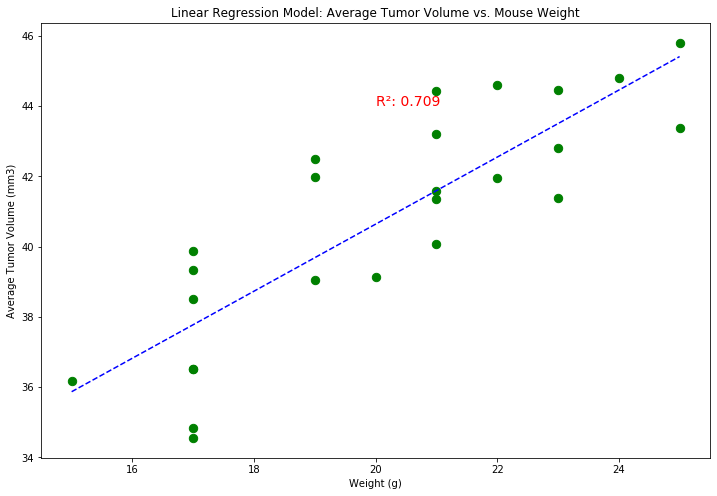

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = weight_group['Weight (g)'] # let this be our x_values
tumor_volume = weight_group['Tumor Volume (mm3)'] # these are going to be our y values

# correlate using scipy.stats 
correlation = st.pearsonr(weight,tumor_volume)

# correlation coefficient
print('Correlation')
print('----------------')
correlation = round(correlation[0],4)
print(f'The correlation coefficient is {correlation}')
print()

# calculate the linear regression with scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)
regression = weight * slope + intercept
# slope line equation
# y = mx + b where m = slope and b = y intercept
eq_line = f'y = {round(slope,3)}x + {round(intercept,3)}'

print('Regression')
print('----------------')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'rValue: {rvalue}')
print(f'pValue: {pvalue}')
print(f'Standard Error: {stderr}')
print()
print(f'Slope Intercept form: {eq_line}')
print()

# plot the regression
plt.figure(figsize=(12, 8))
plt.scatter(weight,tumor_volume,s=70, color="green")
plt.plot(weight, regression, "b--")

plt.title('Linear Regression Model: Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# plt.annotate(s=eq_line, xy=(20, 46), fontsize=14, color='blue', verticalalignment='top')
plt.annotate(s=f'R\u00b2: {round(rvalue**2, 3)}', xy=(20, 44), fontsize=14, color='red')
plt.show()
